Importing the libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



Reading the dataset


In [88]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0bO1wSNePBQsETC-lOZ7GnTdX-lC-TRXk4AYM63b_bM1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'statisticalmachinelearningmodelfo-donotdelete-pr-nxyglbbzrwwrun'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Exploratory data analysis

In [89]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [90]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [92]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Checking for null values and handling null values 

In [93]:
data.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [94]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [95]:
data.mode()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60.0,Male,0.8,0.2,198,25.0,23.0,7.0,3.0,1.0,1.0
1,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,298,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [97]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [98]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']=0.95

In [99]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [100]:
data['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
print(data)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

Data Visualization

Univariate Analysis

In [101]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

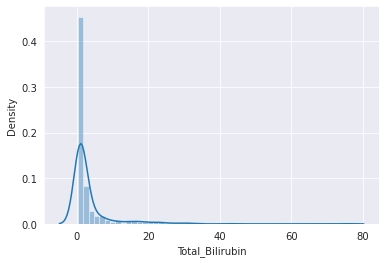

In [102]:
sns.distplot(data["Total_Bilirubin"])

<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Count'>

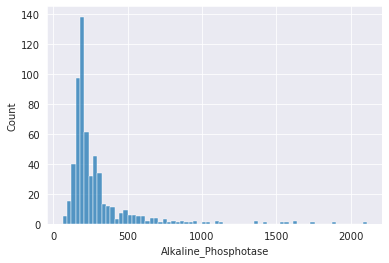

In [103]:
sns.histplot(data["Alkaline_Phosphotase"])


Bivariate Analysis

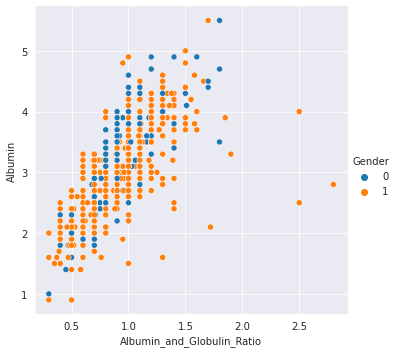

In [104]:
sns.relplot(x="Albumin_and_Globulin_Ratio",y="Albumin",data=data,hue="Gender")

Multi - Variate Analysis

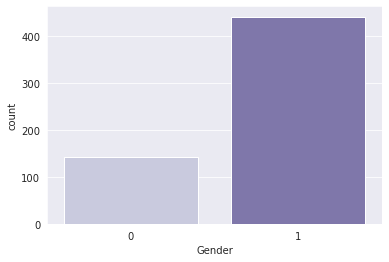

In [105]:
sns.countplot(data.Gender,palette='Purples')
plt.show()

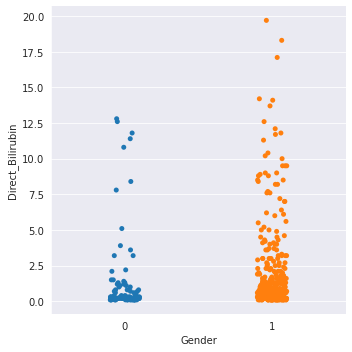

In [106]:
sns.catplot(x="Gender",y="Direct_Bilirubin",data=data)

Text(0, 0.5, 'Age')

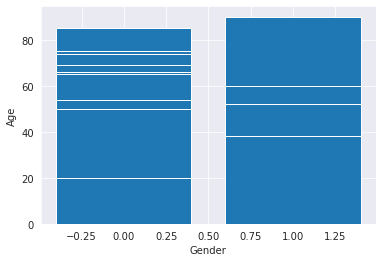

In [107]:
plt.bar(data.Gender,data.Age)
plt.xlabel('Gender')
plt.ylabel('Age')

<AxesSubplot:>

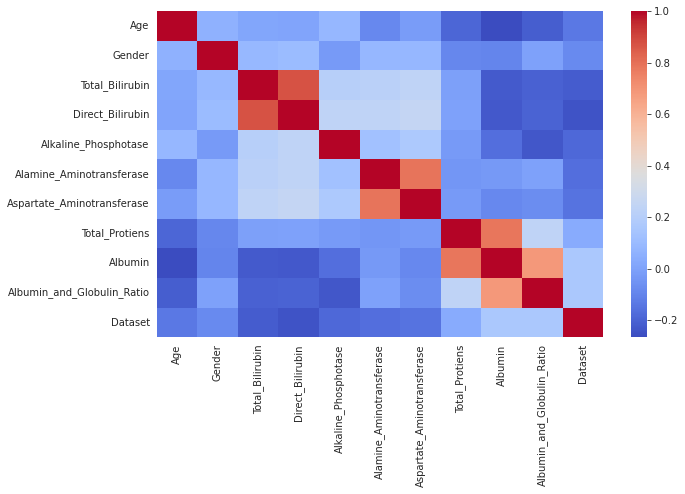

In [108]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='coolwarm')

In [109]:
diseased=data[data['Dataset']==1]
diseased

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,1,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1


<AxesSubplot:xlabel='AGE'>

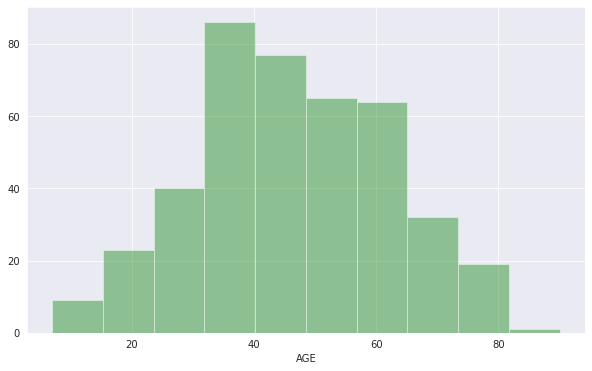

In [110]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,6))
sns.distplot(diseased['Age'],bins=10,kde=False,axlabel='AGE',color='green')


<AxesSubplot:xlabel='Gender', ylabel='count'>

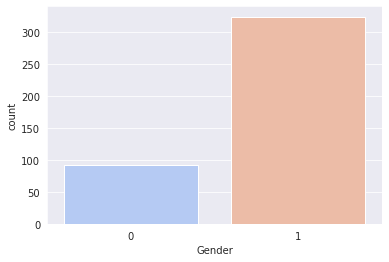

In [111]:
sns.countplot(x='Gender',data=diseased,palette='coolwarm')

Liver Disease 416
No Liver Disease 167


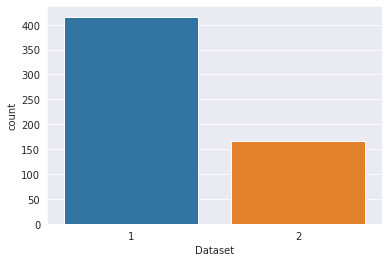

In [112]:
sns.countplot(data=data,x='Dataset')
Ld,N=data['Dataset'].value_counts()
print("Liver Disease",Ld)
print("No Liver Disease",N)
plt.show()

In [113]:
data['Gender'].unique()

array([0, 1])

In [114]:
data['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Dataset',axis=1))
scaled_features = scaler.transform(data.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])
liver_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147961
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650760
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179386
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166288
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719207


Splitting the dataset into independent and dependent variable

In [116]:
X=liver_scaled
y=df['Dataset']

Splitting the independent and dependent features into train and test set

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.value_counts()

1    124
2     51
Name: Dataset, dtype: int64

MODEL BUILDING



Train and test the model using classification algorithms, Model Evaluation

SUPPORT VECTOR MACHINE

In [118]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)

svm_predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix






In [119]:
svm_acc=accuracy_score(y_test,svm_predictions)
svm_prec=precision_score(y_test,svm_predictions)
svm_rec=recall_score(y_test,svm_predictions)


In [120]:
svm_f1=f1_score(y_test,svm_predictions)
svm_mas=mean_absolute_error(y_test,svm_predictions)
svm_rms=np.sqrt(mean_squared_error(y_test,svm_predictions))

In [121]:
scm=confusion_matrix(y_test,svm_predictions)

<AxesSubplot:>

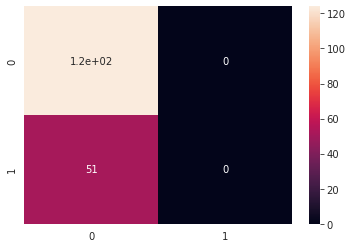

In [122]:
sns.heatmap( scm, annot=True)



In [123]:
print(scm)

print(classification_report(y_test,svm_predictions))

[[124   0]
 [ 51   0]]
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       124
           2       0.00      0.00      0.00        51

    accuracy                           0.71       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.50      0.71      0.59       175



LOGISTIC REGRESSION

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lg=LogisticRegression()

In [126]:
lg.fit(X_train,y_train)

LogisticRegression()

In [127]:
lg_predictions=lg.predict(X_test)

In [128]:
lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))

In [129]:
lgm=confusion_matrix(y_test,lg_predictions)

<AxesSubplot:>

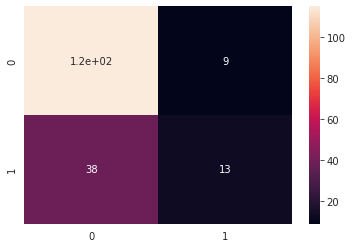

In [130]:
sns.heatmap( lgm, annot=True)

In [131]:
print(lgm)

[[115   9]
 [ 38  13]]


In [132]:
print(classification_report(y_test,lg_predictions))

              precision    recall  f1-score   support

           1       0.75      0.93      0.83       124
           2       0.59      0.25      0.36        51

    accuracy                           0.73       175
   macro avg       0.67      0.59      0.59       175
weighted avg       0.70      0.73      0.69       175



RANDOM FOREST CLASSIFIER

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfc= RandomForestClassifier(n_estimators=600)

In [135]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [136]:
rfc_predictions=rfc.predict(X_test)

In [137]:
rfc_acc=accuracy_score(y_test,rfc_predictions)
rfc_prec=precision_score(y_test,rfc_predictions)
rfc_rec=recall_score(y_test,rfc_predictions)
rfc_f1=f1_score(y_test,rfc_predictions)
rfc_mas=mean_absolute_error(y_test,rfc_predictions)
rfc_rms=np.sqrt(mean_squared_error(y_test,rfc_predictions))

In [138]:
rfm=confusion_matrix(y_test,rfc_predictions)

<AxesSubplot:>

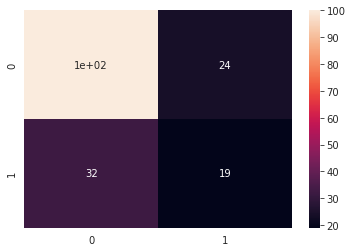

In [139]:
sns.heatmap( rfm, annot=True)

In [140]:
print(rfm)

[[100  24]
 [ 32  19]]


In [141]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           1       0.76      0.81      0.78       124
           2       0.44      0.37      0.40        51

    accuracy                           0.68       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.68      0.67       175



DECISION TREE CLASSIFIER ALGORITHM

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dtree=DecisionTreeClassifier()

In [144]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [145]:
dtree_predictions=dtree.predict(X_test)

In [146]:
dtree_acc=accuracy_score(y_test,dtree_predictions)
dtree_prec=precision_score(y_test,dtree_predictions)
dtree_rec=recall_score(y_test,dtree_predictions)
dtree_f1=f1_score(y_test,dtree_predictions)
dtree_mas=mean_absolute_error(y_test,dtree_predictions)
dtree_rms=np.sqrt(mean_squared_error(y_test,dtree_predictions))

In [147]:
dtm=confusion_matrix(y_test,dtree_predictions)

<AxesSubplot:>

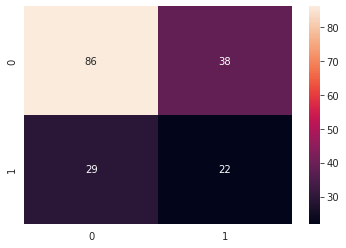

In [148]:
sns.heatmap( dtm, annot=True)

In [149]:
print(dtm)

[[86 38]
 [29 22]]


In [150]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           1       0.75      0.69      0.72       124
           2       0.37      0.43      0.40        51

    accuracy                           0.62       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.64      0.62      0.63       175



K NEAREST NEIGHBOURS ALGORITHM



In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

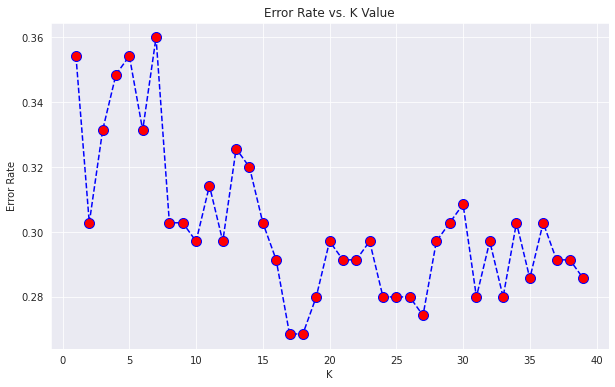

In [153]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [154]:
error_rate[36]

0.2914285714285714

In [155]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(classification_report(y_test,knn_predictions))

WITH K=36


              precision    recall  f1-score   support

           1       0.71      0.96      0.82       124
           2       0.38      0.06      0.10        51

    accuracy                           0.70       175
   macro avg       0.54      0.51      0.46       175
weighted avg       0.61      0.70      0.61       175



In [156]:
knn_acc=accuracy_score(y_test,knn_predictions)
knn_prec=precision_score(y_test,knn_predictions)
knn_rec=recall_score(y_test,knn_predictions)
knn_f1=f1_score(y_test,knn_predictions)
knn_mas=mean_absolute_error(y_test,knn_predictions)
knn_rms=np.sqrt(mean_squared_error(y_test,knn_predictions))

In [157]:
knm=confusion_matrix(y_test,knn_predictions)

<AxesSubplot:>

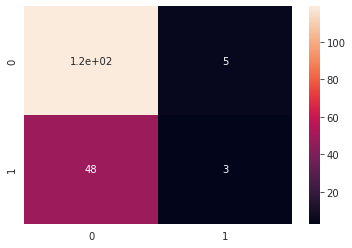

In [158]:
sns.heatmap( knm, annot=True)

In [159]:
print(knm)

[[119   5]
 [ 48   3]]


Analyzing the different machine learning models

In [160]:
d={'Machine Learning Algorithm':['Support Vector Machine','Logistic Regression','Random Forest Classifier','Decision Tree Classifier','K Nearest Neighbours'],'Accuracy_Score':[svm_acc*100,lg_acc*100,rfc_acc*100,dtree_acc*100,knn_acc*100],'Precision_Score':[svm_prec*100,lg_prec*100,rfc_prec*100,dtree_prec*100,knn_prec*100],'Recall_Score':[svm_rec*100,lg_rec*100,rfc_rec*100,dtree_rec*100,knn_rec*100],'F1_Score':[svm_f1*100,lg_f1*100,rfc_f1*100,dtree_f1*100,knn_f1*100],'Mean_Absolute_Error':[svm_mas*100,lg_mas*100,rfc_mas*100,dtree_mas*100,knn_mas*100],'Root_Mean_Square_Error':[svm_rms*100,lg_rms*100,rfc_rms*100,dtree_rms*100,knn_rms*100]}


In [161]:
results=pd.DataFrame(d)


In [162]:
results

,Machine Learning Algorithm,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,Mean_Absolute_Error,Root_Mean_Square_Error
0,Support Vector Machine,70.857143,70.857143,100.000000,82.943144,29.142857,53.984125
1,Logistic Regression,73.142857,75.163399,92.741935,83.032491,26.857143,51.823878
2,Random Forest Classifier,68.000000,75.757576,80.645161,78.125000,32.000000,56.568542
3,Decision Tree Classifier,61.714286,74.782609,69.354839,71.966527,38.285714,61.875451
4,K Nearest Neighbours,69.714286,71.257485,95.967742,81.786942,30.285714,55.032458


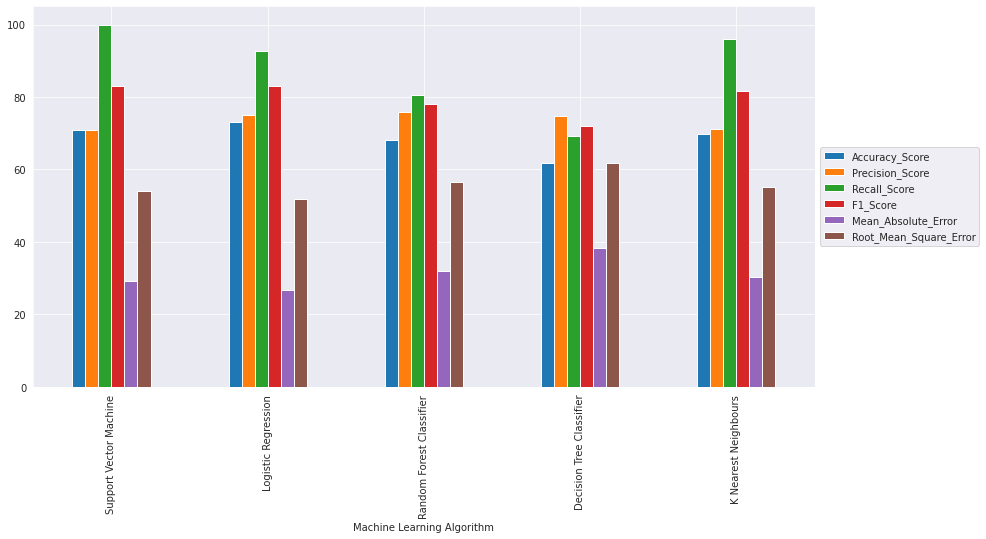

In [163]:
results.plot.bar(x='Machine Learning Algorithm',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

Save The Model


In [164]:
import pickle
pickle.dump(model, open('SVM.pkl','wb'))

#Deployment

In [165]:
!pip install -U ibm-watson-machine-learning

In [166]:
from ibm_watson_machine_learning import APIClient
import json 
import numpy as np

Authenticate and set space

In [167]:
wml_credentials={
    "apikey":"AluxVbbOjio3fHsuNSWWK-rZXX54vtrvqLSJTj5QTt4I",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [168]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
0e92c748-d15a-4c05-bca5-6c48e881b6f7  mlr   2022-11-14T06:51:47.394Z
------------------------------------  ----  ------------------------


In [169]:
space_id ="0e92c748-d15a-4c05-bca5-6c48e881b6f7"

In [170]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [171]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [172]:
MODEL_NAME="demoModel"
DEPLOYMENT_NAME="demodeploy"
DEMO_MODEL=model

In [173]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [174]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [175]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [176]:
model_details


{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'Age', 'type': 'float64'},
      {'name': 'Gender', 'type': 'float64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'float64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'float64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'float64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-14T18:56:24.790Z',
  'id': '565109c8-628e-4b5b-af9a-41730d4997ec',
  'modified_at': '2022-11-14T18:56:27.535Z',
  'n